In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anyas-gojo-revival-bondman/sample_submission.csv
/kaggle/input/anyas-gojo-revival-bondman/trainData.csv
/kaggle/input/anyas-gojo-revival-bondman/testData.csv


## Load in the datasets

In [2]:
train_df = pd.read_csv("../input/anyas-gojo-revival-bondman/trainData.csv")
test_df = pd.read_csv("../input/anyas-gojo-revival-bondman/testData.csv")
train_df['train_test'] = 1
test_df['train_test'] = 0
test_df['is_fraud'] = np.NaN
data_df = pd.concat([train_df, test_df])
%matplotlib inline

In [3]:
# Keep useful features
useful_features = ['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud', 'train_test']
train_df = train_df[useful_features]
test_df = test_df[useful_features]
data_df = data_df[useful_features]

In [4]:
df_test_id = pd.read_csv('../input/anyas-gojo-revival-bondman/testData.csv').id

## Analyze the data
### Check the columns
Find out categorical and continuous features
##### Categorical Data:
* is_fraud
* gender
* category
* trans_date_trans_time
* street
* state
* zip
* job
* dob
* merchant

##### Continuous Data:
* amt
* lat
* long
* city_pop
* merch_lat
* merch_long

In [5]:
train_df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat',
       'merch_long', 'is_fraud', 'train_test'],
      dtype='object')

In [6]:
# preview the data
train_df.head()

,trans_date_trans_time,merchant,category,amt,gender,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,train_test
0,2019-12-15 10:35:10,fraud_Ruecker Group,misc_net,7.19,M,TN,38060,35.2229,-89.5518,9496,Furniture conservator/restorer,1993-03-23,35.189455,-90.121666,0,1
1,2019-04-10 21:49:53,fraud_Lynch Ltd,shopping_pos,6.32,F,WA,98233,48.4786,-122.3345,14871,Public house manager,1974-03-10,49.004316,-122.745016,0,1
2,2020-02-16 10:56:18,fraud_Bauch-Raynor,grocery_pos,147.59,F,ME,4226,44.6084,-70.6993,190,Animal nutritionist,1970-04-17,44.455449,-70.809148,0,1
3,2020-04-30 16:14:16,"fraud_Effertz, Welch and Schowalter",entertainment,32.40,M,VA,22213,38.8954,-77.1633,207410,Mudlogger,1984-07-03,39.476941,-77.613438,0,1
4,2019-12-05 21:07:59,fraud_Wilkinson LLC,personal_care,29.79,M,NJ,7640,40.9918,-73.9800,4664,"Radiographer, diagnostic",1965-06-30,40.863808,-74.674018,0,1


In [7]:
# preview the end
train_df.tail()

,trans_date_trans_time,merchant,category,amt,gender,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,train_test
523169,2020-06-17 05:58:27,"fraud_Kerluke, Considine and Macejkovic",misc_net,22.71,F,WV,24986,37.7827,-80.3129,5216,Community development worker,1993-10-05,38.781304,-80.110562,0,1
523170,2019-03-24 16:26:29,fraud_Kuhn Group,food_dining,3.47,F,AL,35554,33.9315,-87.6194,1186,Politician's assistant,1986-11-12,34.684771,-86.703349,0,1
523171,2019-12-02 09:37:54,"fraud_Bins, Balistreri and Beatty",shopping_pos,3.01,M,NJ,7022,40.8170,-74.0000,13835,"Programmer, multimedia",1967-05-28,40.201126,-74.508935,0,1
523172,2019-04-09 09:41:29,"fraud_Kuhic, Bins and Pfeffer",shopping_net,107.92,M,CA,93627,36.4992,-120.0936,123,Early years teacher,1973-02-07,37.053394,-120.609172,0,1
523173,2019-06-26 18:29:38,fraud_Denesik and Sons,shopping_pos,138.92,M,AR,72165,35.5762,-91.4539,111,Careers information officer,2000-06-13,36.532570,-91.066545,0,1


#### Luckily for this dataset, there are no null values

In [8]:
# checking for any null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523174 entries, 0 to 523173
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  523174 non-null  object 
 1   merchant               523174 non-null  object 
 2   category               523174 non-null  object 
 3   amt                    523174 non-null  float64
 4   gender                 523174 non-null  object 
 5   state                  523174 non-null  object 
 6   zip                    523174 non-null  int64  
 7   lat                    523174 non-null  float64
 8   long                   523174 non-null  float64
 9   city_pop               523174 non-null  int64  
 10  job                    523174 non-null  object 
 11  dob                    523174 non-null  object 
 12  merch_lat              523174 non-null  float64
 13  merch_long             523174 non-null  float64
 14  is_fraud               523174 non-nu

In [9]:
train_df.describe()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,train_test
count,523174.000000,523174.000000,523174.000000,523174.000000,5.231740e+05,523174.000000,523174.000000,523174.000000,523174.0
mean,74.126999,48778.123106,38.545987,-90.222333,8.851568e+04,38.546871,-90.222705,0.014347,1.0
std,164.627380,26915.789078,5.072909,13.774292,3.007854e+05,5.106024,13.786031,0.118917,0.0
min,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,19.032277,-166.664828,0.000000,1.0
25%,9.700000,26041.000000,34.668900,-96.798000,7.430000e+02,34.751576,-96.901801,0.000000,1.0
50%,47.680000,48154.000000,39.371600,-87.461600,2.456000e+03,39.372253,-87.426508,0.000000,1.0
75%,83.870000,72042.000000,41.940400,-80.158000,2.032800e+04,41.958544,-80.219874,0.000000,1.0
max,15047.030000,99783.000000,66.693300,-67.950300,2.906700e+06,67.510267,-66.950902,1.000000,1.0


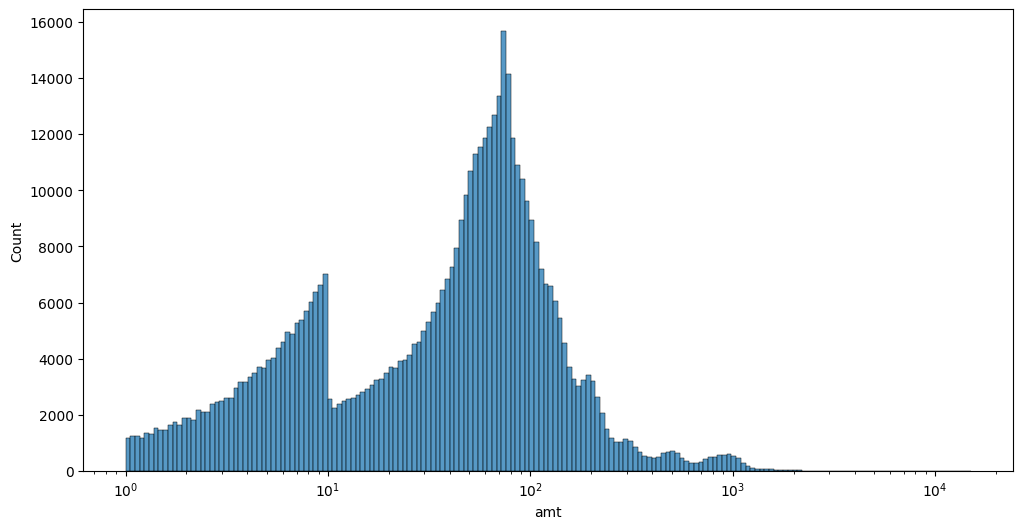

In [10]:
# distribution of amt
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x="amt", log_scale=True)
plt.show()

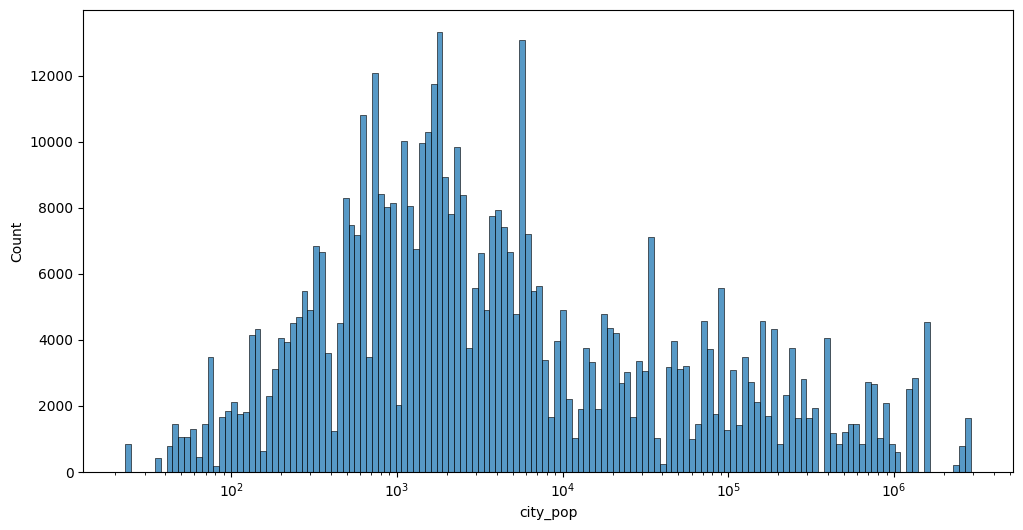

In [11]:
# distribution of city_pop
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x="city_pop", log_scale=True)
plt.show()

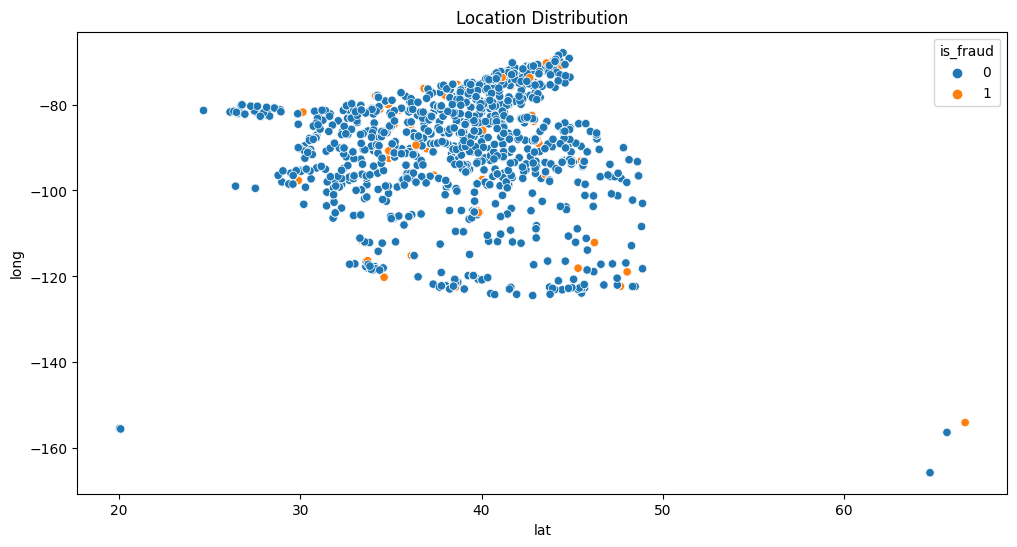

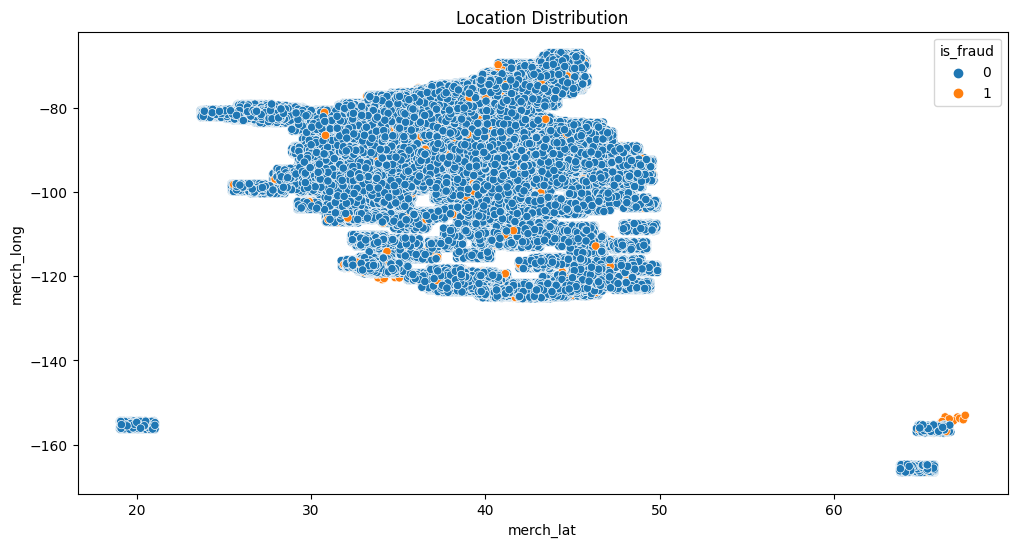

In [12]:
# distribution of location
location = [["lat", "long"], ["merch_lat", "merch_long"]]
for coords in location:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=train_df, x=coords[0], y=coords[1], hue="is_fraud")
    plt.title("Location Distribution")
    plt.show()

In [13]:
# get categorical data to plot
categorical_col = train_df[[ 'category', 'gender', 'state', 'merchant', 'job']]

In [14]:
from collections import Counter
# get the top 30 values for a category
def top_30(category):
    counter = Counter()
    for i in category:
        counter[i] += 1;
    df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    df = df.rename(columns={'index':'value', 0:'count'}).sort_values(by='count', ascending=False).reset_index(drop=True)
    return df[:30]

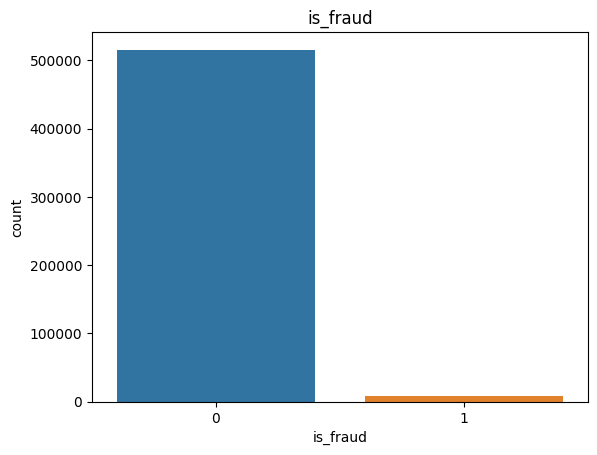

In [15]:
sns.countplot(train_df, x="is_fraud")
plt.title("is_fraud")
plt.show()

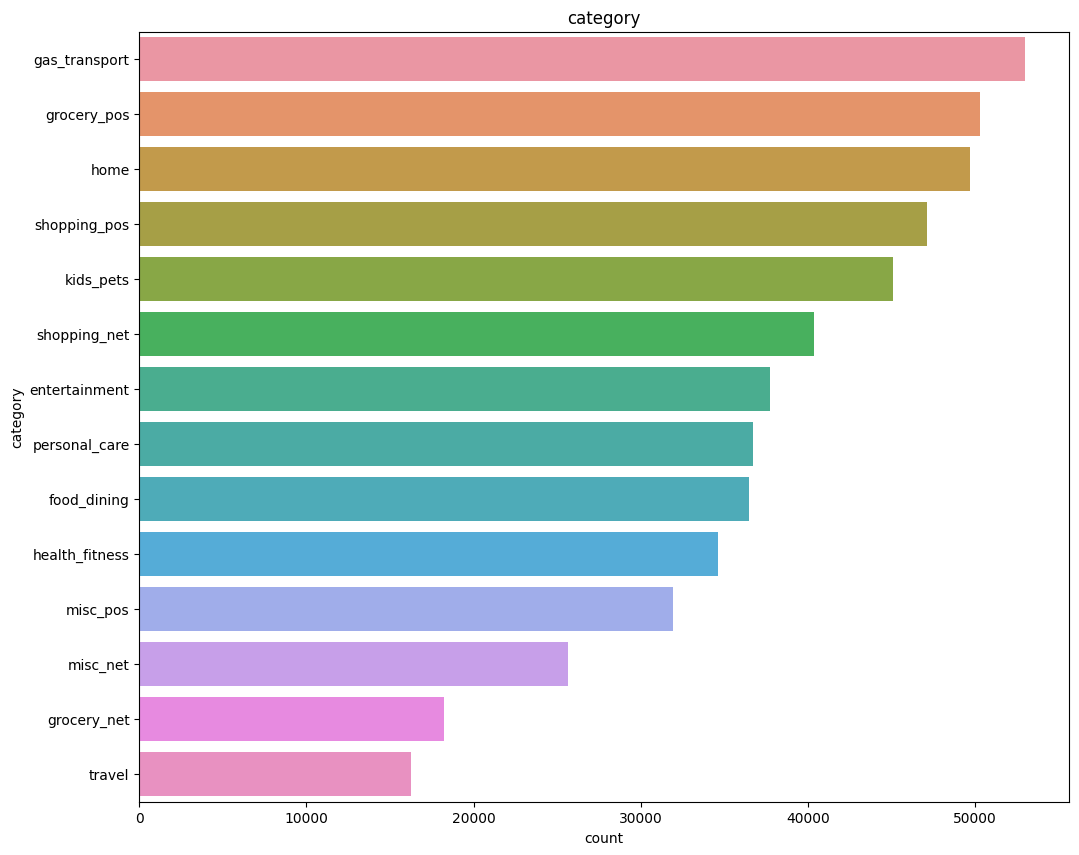

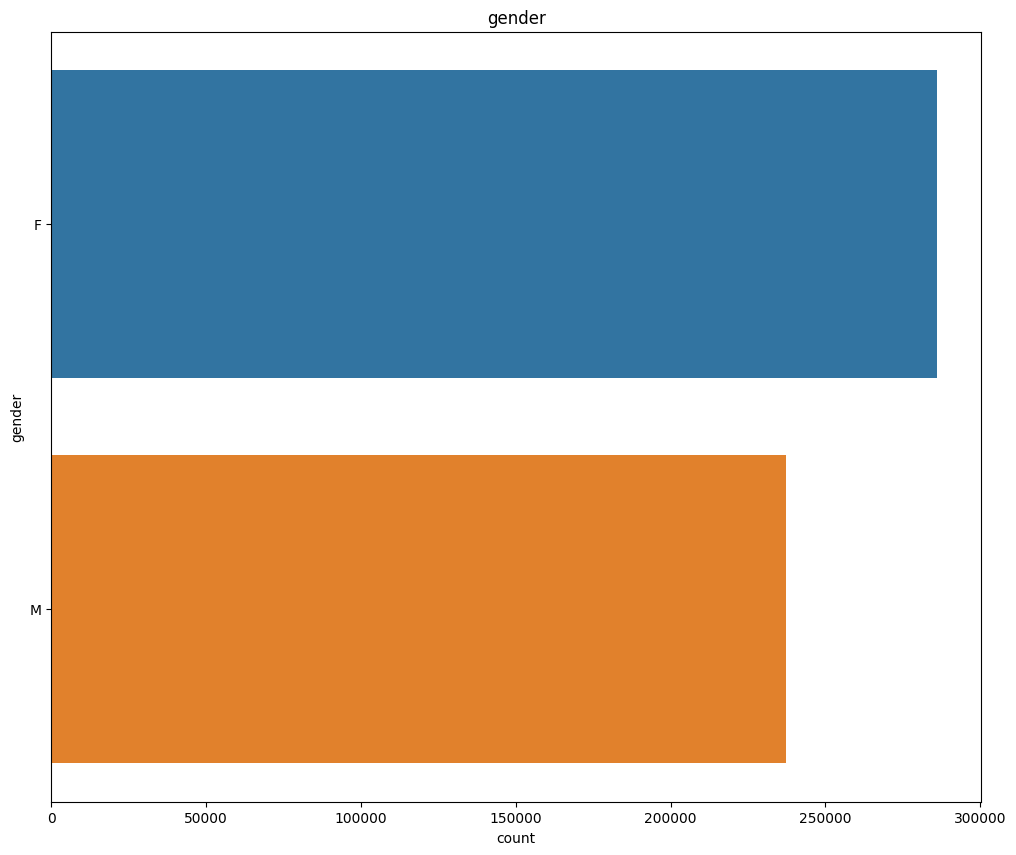

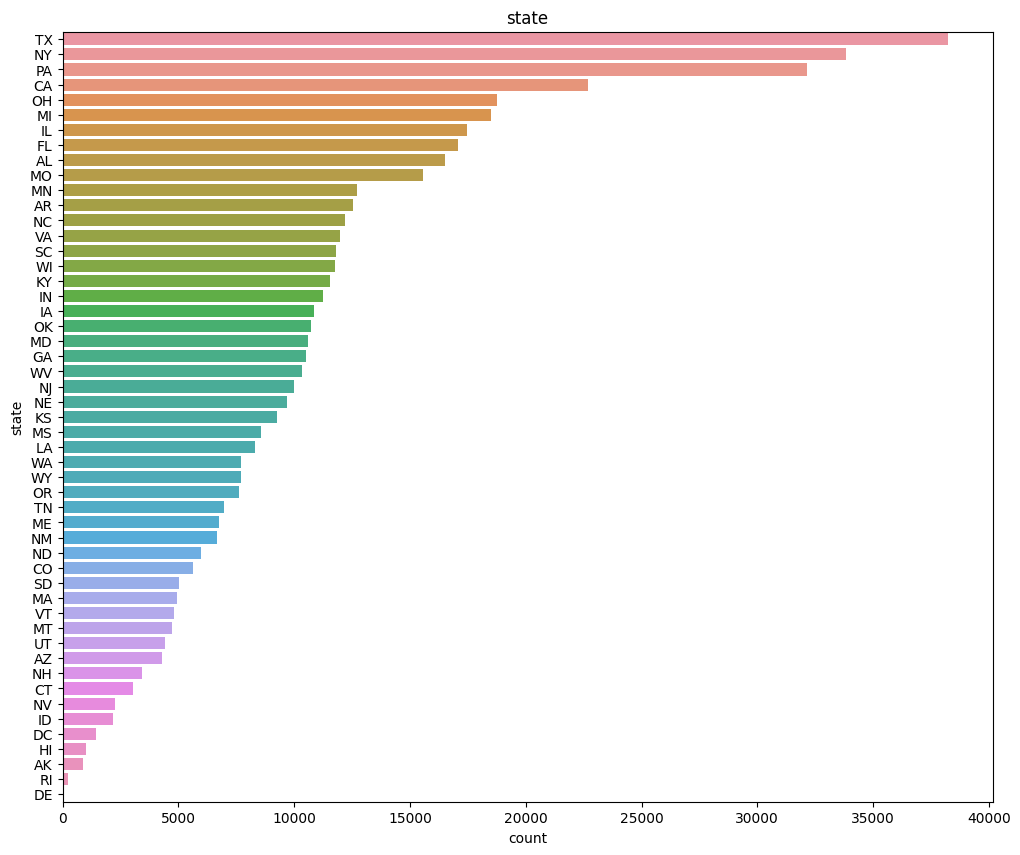

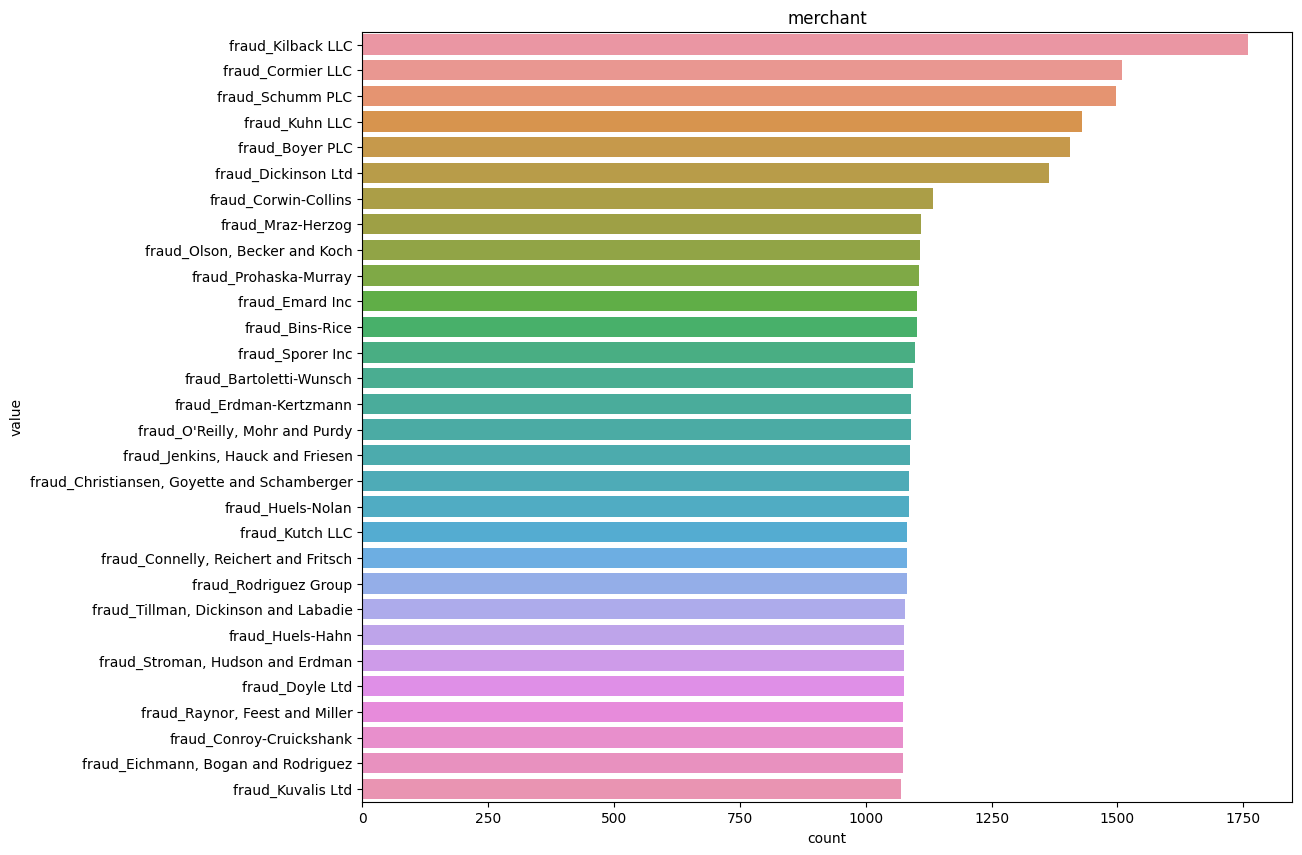

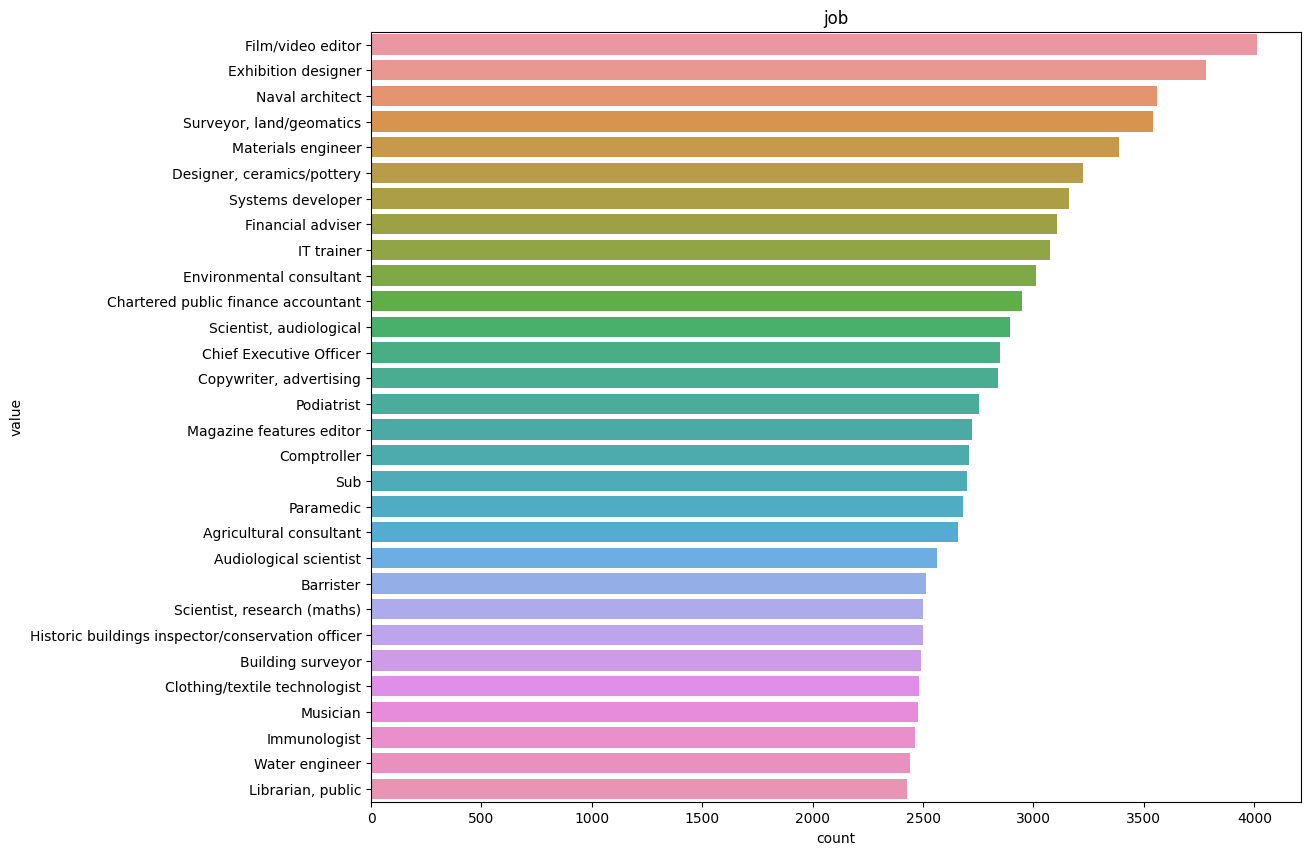

In [16]:
for i in categorical_col.columns:
    plt.figure(figsize=(12, 10))
    if i == 'merchant' or i == 'job':
        top_30_df = top_30(categorical_col[i])
        sns.barplot(x=top_30_df["count"], y=top_30_df["value"])
    else:    
        sns.barplot(y=categorical_col[i].value_counts().index, x=categorical_col[i].value_counts())
    plt.title(i)
    plt.show()

### Feature Engineering
#### Extract year from dob
#### Add age as of 2023
#### Get year, month, day, hour from transaction time

In [17]:
train_df['dob_year'] = train_df['dob'].apply(lambda x: x.split("-")[0])
train_df['trans_year'] = train_df['trans_date_trans_time'].apply(lambda x: x.split("-")[0])
train_df['trans_month'] = train_df['trans_date_trans_time'].apply(lambda x: x.split("-")[1])
train_df['trans_day'] = train_df['trans_date_trans_time'].apply(lambda x: x.split("-")[2].split(" ")[0])
train_df['trans_hour'] = train_df['trans_date_trans_time'].apply(lambda x: x.split("-")[2].split(" ")[1].split(":")[0])
train_df['age'] = train_df['dob_year'].apply(lambda x: 2023 - int(x))

In [18]:
# check new columns
train_df.head()

,trans_date_trans_time,merchant,category,amt,gender,state,zip,lat,long,city_pop,...,merch_lat,merch_long,is_fraud,train_test,dob_year,trans_year,trans_month,trans_day,trans_hour,age
0,2019-12-15 10:35:10,fraud_Ruecker Group,misc_net,7.19,M,TN,38060,35.2229,-89.5518,9496,...,35.189455,-90.121666,0,1,1993,2019,12,15,10,30
1,2019-04-10 21:49:53,fraud_Lynch Ltd,shopping_pos,6.32,F,WA,98233,48.4786,-122.3345,14871,...,49.004316,-122.745016,0,1,1974,2019,04,10,21,49
2,2020-02-16 10:56:18,fraud_Bauch-Raynor,grocery_pos,147.59,F,ME,4226,44.6084,-70.6993,190,...,44.455449,-70.809148,0,1,1970,2020,02,16,10,53
3,2020-04-30 16:14:16,"fraud_Effertz, Welch and Schowalter",entertainment,32.40,M,VA,22213,38.8954,-77.1633,207410,...,39.476941,-77.613438,0,1,1984,2020,04,30,16,39
4,2019-12-05 21:07:59,fraud_Wilkinson LLC,personal_care,29.79,M,NJ,7640,40.9918,-73.9800,4664,...,40.863808,-74.674018,0,1,1965,2019,12,05,21,58


In [19]:
train_df.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
gender                    object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
merch_lat                float64
merch_long               float64
is_fraud                   int64
train_test                 int64
dob_year                  object
trans_year                object
trans_month               object
trans_day                 object
trans_hour                object
age                        int64
dtype: object

In [20]:
col_to_int = ['trans_year', 'trans_month', 'trans_day', 'trans_hour']
for col in col_to_int:
    train_df[col] = train_df[col].astype('int64')

In [21]:
train_df.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
gender                    object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
merch_lat                float64
merch_long               float64
is_fraud                   int64
train_test                 int64
dob_year                  object
trans_year                 int64
trans_month                int64
trans_day                  int64
trans_hour                 int64
age                        int64
dtype: object

### Find correlation to fraud

#### Fraud seems to occur in transactions with older people and if the amount is large. However, there does not seem to be much correlation between location. If population is large, fraud tends to happen more often which makes sense. A city with a larger population will more often have frauds than the smaller ones. 

In [22]:
# compare fraud rates across age, amt, lat, long, merch_lat, merch_long
pd.pivot_table(train_df, index = 'is_fraud', values = ['age', 'amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop', 'trans_year', 'trans_month', 'trans_day', 'trans_hour'])

,age,amt,city_pop,lat,long,merch_lat,merch_long,trans_day,trans_hour,trans_month,trans_year
is_fraud,,,,,,,,,,,
0,49.733821,67.472152,88388.155445,38.544275,-90.226792,38.545313,-90.227172,15.596706,12.803309,6.140554,2019.287068
1,52.561684,531.320092,97276.763256,38.663609,-89.916041,38.653901,-89.915808,16.033173,14.037836,5.586331,2019.304556


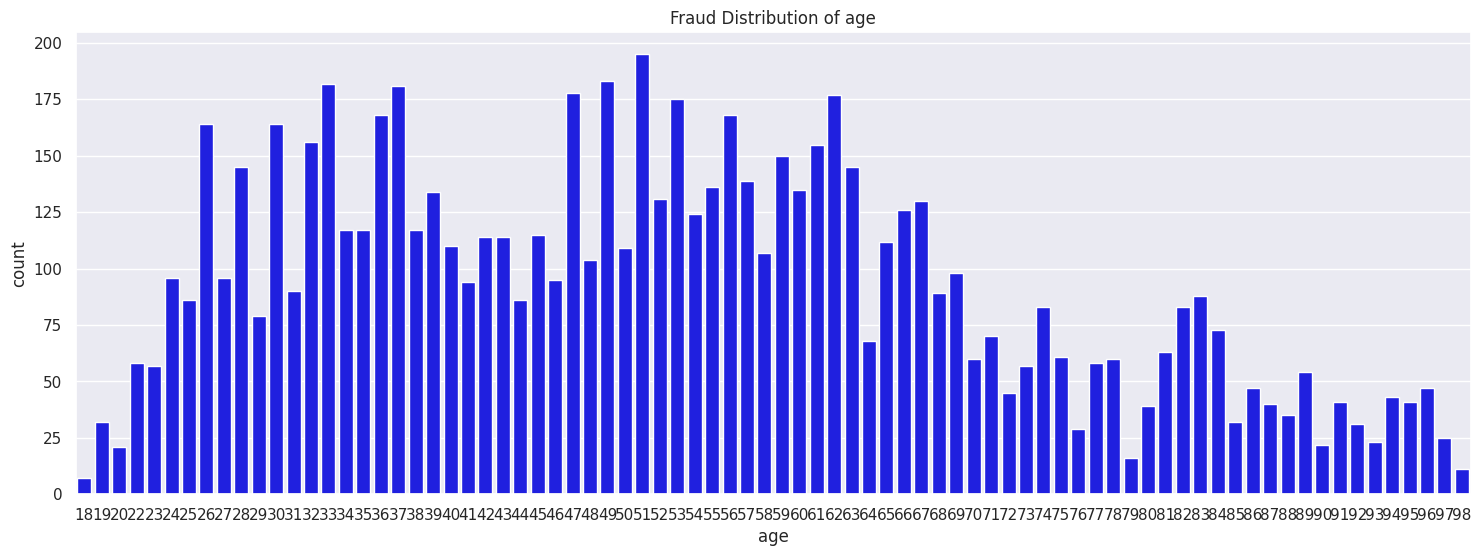

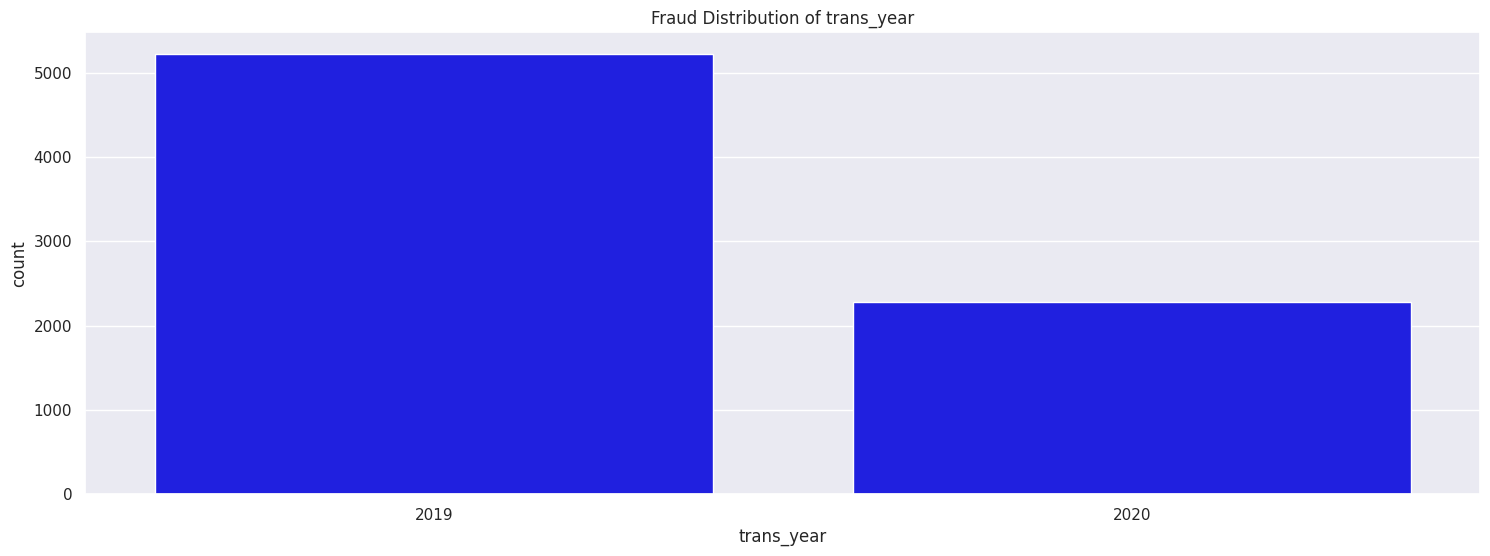

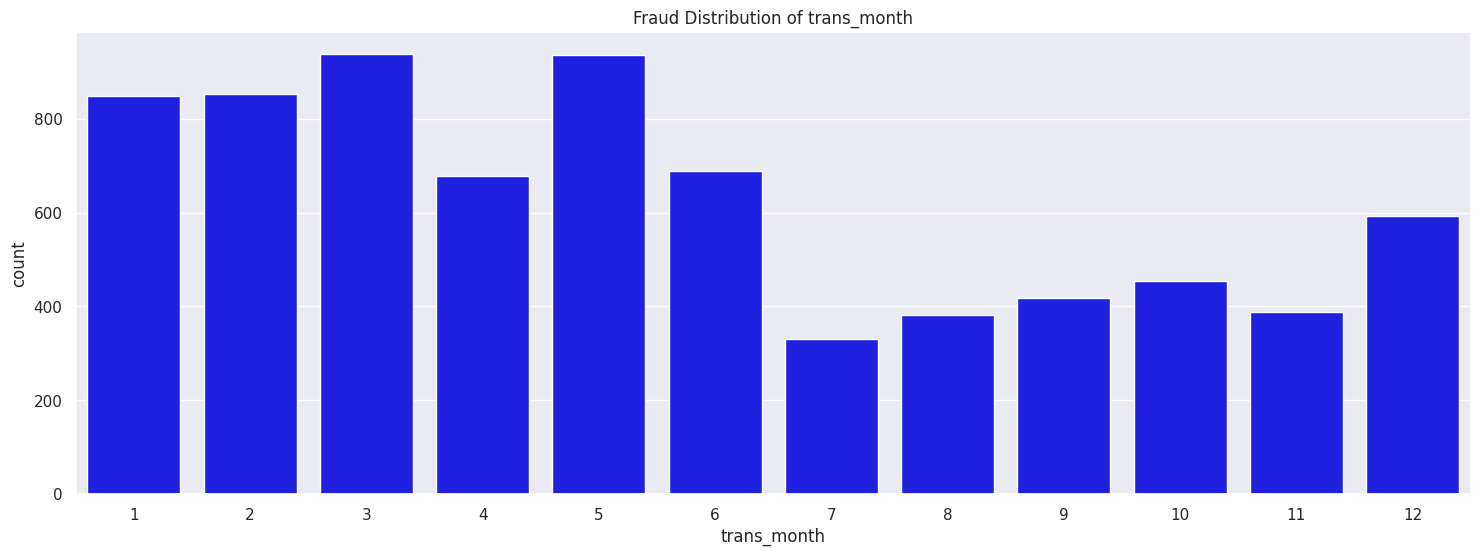

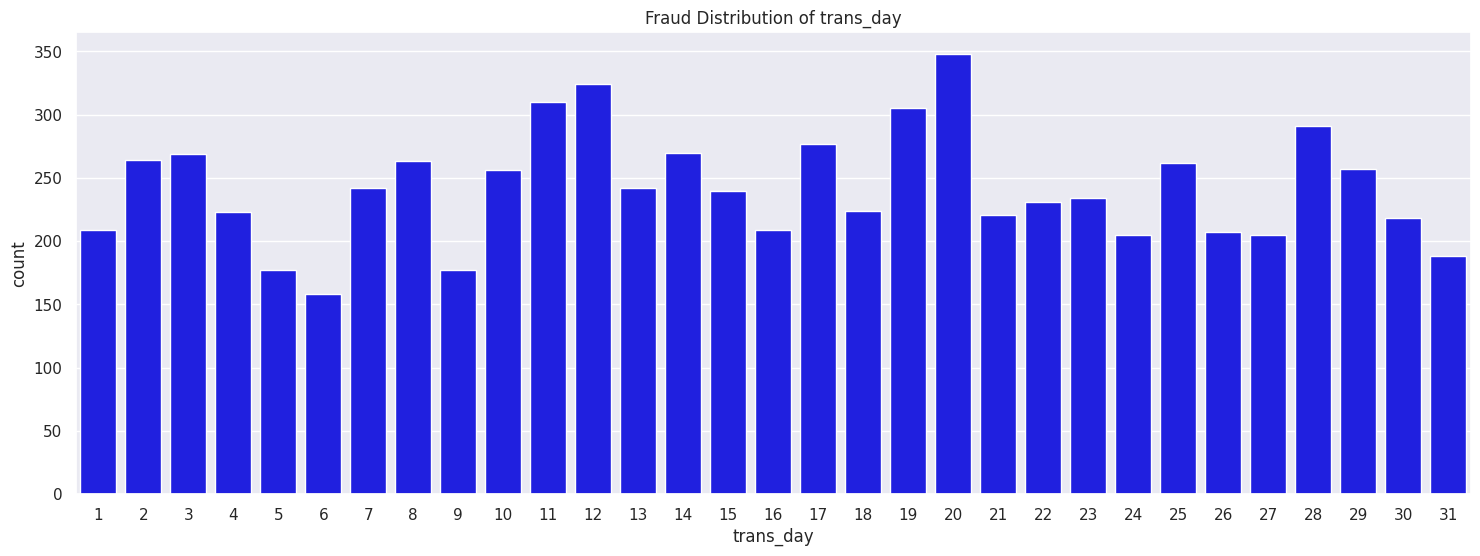

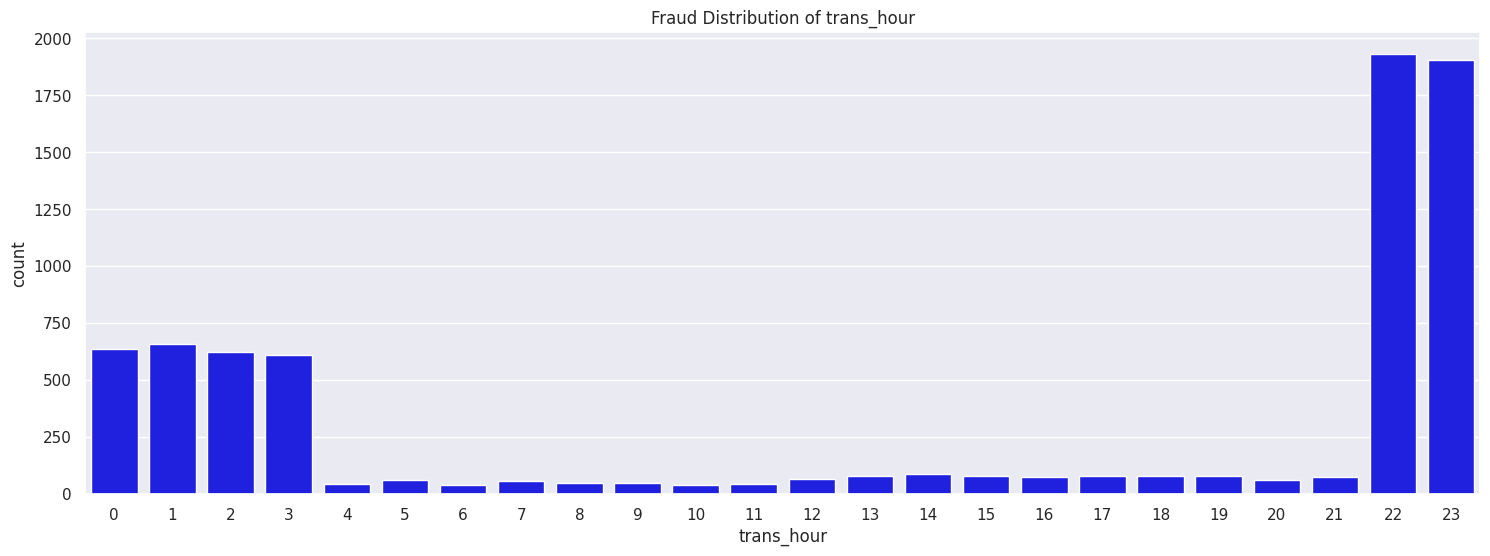

In [23]:
col_to_graph = ['age', 'trans_year', 'trans_month', 'trans_day', 'trans_hour']
for col in col_to_graph:
    sns.set()
    sns.set_palette("pastel")
    plt.figure(figsize=(18,6))
    sns.countplot(data=train_df[train_df['is_fraud'] == 1], x=col, color='blue')
    plt.title("Fraud Distribution of " + col)
    plt.xlabel(col)
    plt.show()

#### Correlation between Numeric Features
##### It seems that latitude, longitude, and zip are highly correlated with each other thus we can remove latitude and longitude. Obviously age and dob_year are correlated.

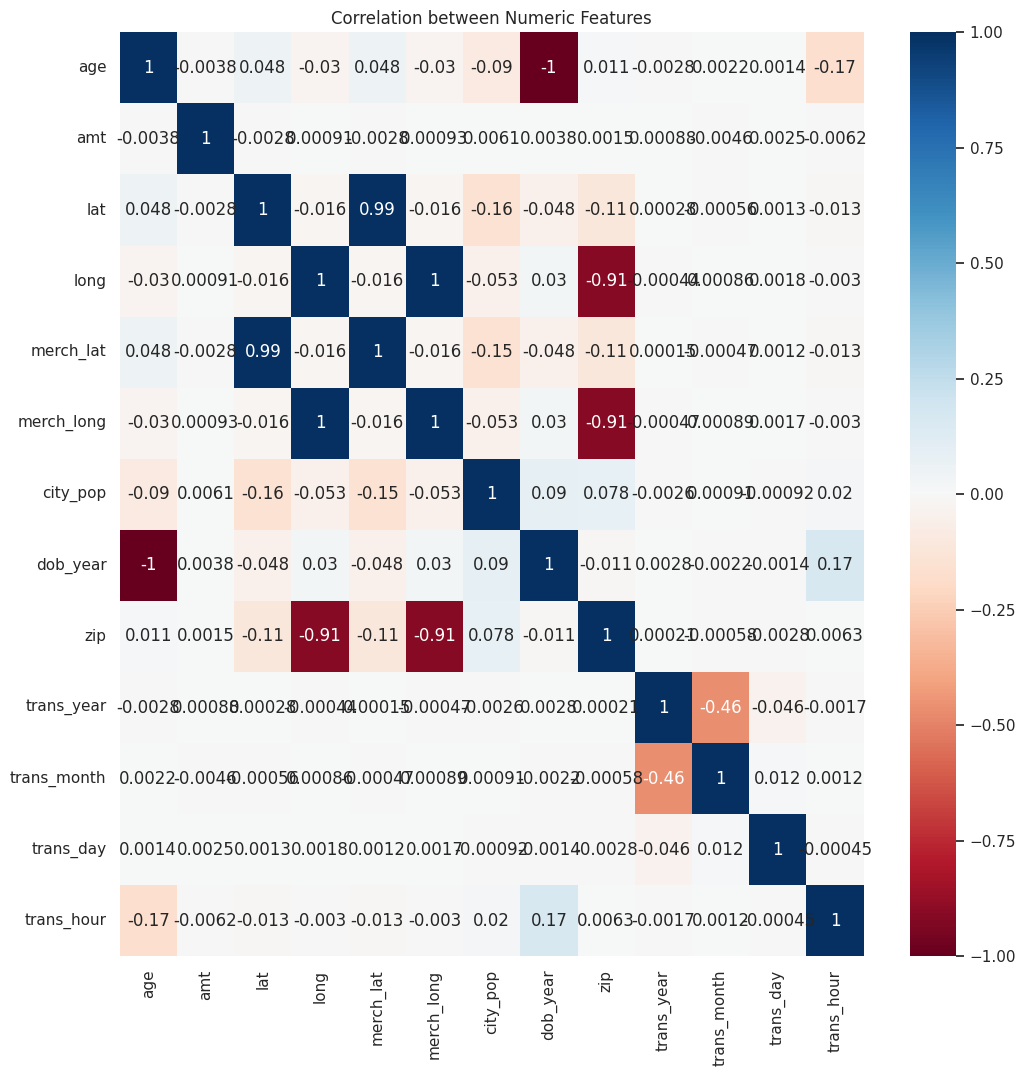

In [24]:
corr_mat = train_df[['age', 'amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop', 'dob_year', 'zip', 'trans_year', 'trans_month', 'trans_day', 'trans_hour']].corr()

plt.figure(figsize=(12,12))
plt.title("Correlation between Numeric Features")
sns.heatmap(corr_mat, cmap='RdBu', annot=True, center=0, vmin=-1)
plt.show()

### Data Preprocessing for Models
#### **1)** Create variables from above for both data sets
#### **2)** Normalize amt and city_pop using log to get a normal distribution
#### **3)** Transform categorical data
#### **4)** Scale the numerical features

,merchant,category,gender,state,lat,long,job,is_fraud,train_test,trans_year,trans_month,trans_day,trans_hour,age,norm_amt,norm_city_pop
0,fraud_Ruecker Group,misc_net,M,TN,35.2229,-89.5518,Furniture conservator/restorer,0.0,1,2019,12,15,10,30,2.102914,9.158731
1,fraud_Lynch Ltd,shopping_pos,F,WA,48.4786,-122.3345,Public house manager,0.0,1,2019,4,10,21,49,1.990610,9.607236
2,fraud_Bauch-Raynor,grocery_pos,F,ME,44.6084,-70.6993,Animal nutritionist,0.0,1,2020,2,16,10,53,5.001191,5.252273
3,"fraud_Effertz, Welch and Schowalter",entertainment,M,VA,38.8954,-77.1633,Mudlogger,0.0,1,2020,4,30,16,39,3.508556,12.242458
4,fraud_Wilkinson LLC,personal_care,M,NJ,40.9918,-73.9800,"Radiographer, diagnostic",0.0,1,2019,12,5,21,58,3.427190,8.447843


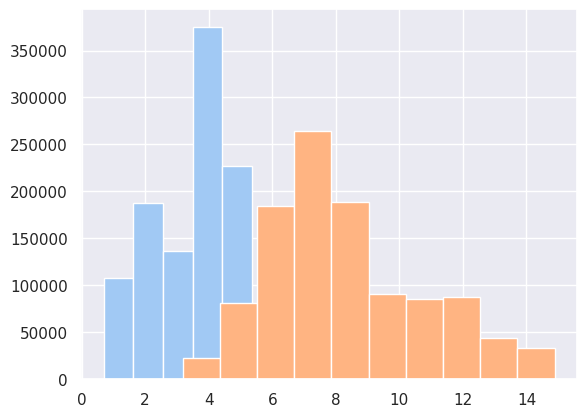

In [25]:
#create all variables that we did above for both training and test dataframes 
data_df['dob_year'] = data_df['dob'].apply(lambda x: x.split("-")[0])
data_df['trans_year'] = data_df['trans_date_trans_time'].apply(lambda x: x.split("-")[0])
data_df['trans_month'] = data_df['trans_date_trans_time'].apply(lambda x: x.split("-")[1])
data_df['trans_day'] = data_df['trans_date_trans_time'].apply(lambda x: x.split("-")[2].split(" ")[0])
data_df['trans_hour'] = data_df['trans_date_trans_time'].apply(lambda x: x.split("-")[2].split(" ")[1].split(":")[0])
data_df['age'] = data_df['dob_year'].apply(lambda x: 2023 - int(x))

# Set columns to ints
col_to_int = ['trans_year', 'trans_month', 'trans_day', 'trans_hour']
for col in col_to_int:
    data_df[col] = data_df[col].astype('int64')
    
# log norm of amt
data_df['norm_amt'] = np.log(data_df.amt+1)
data_df['norm_amt'].hist()

# log norm of city_pop
data_df['norm_city_pop'] = np.log(data_df.city_pop+1)
data_df['norm_city_pop'].hist()

# keep important features
features = ['merchant', 'category', 'gender', 'state', 'lat', 'long', 'job', 'is_fraud', 'train_test', 'trans_year','trans_month', 'trans_day', 'trans_hour', 'age', 'norm_amt', 'norm_city_pop']

data_df = data_df[features]
data_df.head()

In [26]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [27]:
scaler = MinMaxScaler()
data_df[['trans_year','trans_month', 'trans_day', 'trans_hour']]= scaler.fit_transform(data_df[['trans_year','trans_month', 'trans_day', 'trans_hour']])
data_df

,merchant,category,gender,state,lat,long,job,is_fraud,train_test,trans_year,trans_month,trans_day,trans_hour,age,norm_amt,norm_city_pop
0,fraud_Ruecker Group,misc_net,M,TN,35.2229,-89.5518,Furniture conservator/restorer,0.0,1,0.0,1.000000,0.466667,0.434783,30,2.102914,9.158731
1,fraud_Lynch Ltd,shopping_pos,F,WA,48.4786,-122.3345,Public house manager,0.0,1,0.0,0.272727,0.300000,0.913043,49,1.990610,9.607236
2,fraud_Bauch-Raynor,grocery_pos,F,ME,44.6084,-70.6993,Animal nutritionist,0.0,1,1.0,0.090909,0.500000,0.434783,53,5.001191,5.252273
3,"fraud_Effertz, Welch and Schowalter",entertainment,M,VA,38.8954,-77.1633,Mudlogger,0.0,1,1.0,0.272727,0.966667,0.695652,39,3.508556,12.242458
4,fraud_Wilkinson LLC,personal_care,M,NJ,40.9918,-73.9800,"Radiographer, diagnostic",0.0,1,0.0,1.000000,0.133333,0.913043,58,3.427190,8.447843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,M,MO,40.4931,-91.8912,Town planner,NaN,0,1.0,1.000000,1.000000,1.000000,57,3.801538,6.253829
555715,fraud_Hoppe-Parisian,kids_pets,M,TX,29.0393,-95.4401,Futures trader,NaN,0,1.0,1.000000,1.000000,1.000000,24,4.725971,10.266045
555716,fraud_Rau-Robel,kids_pets,F,WA,46.1966,-118.9017,Musician,NaN,0,1.0,1.000000,1.000000,1.000000,42,4.475972,8.212026
555717,fraud_Breitenberg LLC,travel,M,ID,44.6255,-116.4493,Cartographer,NaN,0,1.0,1.000000,1.000000,1.000000,58,2.196113,4.867534


In [28]:
label_encoder = LabelEncoder()

label_df = data_df.copy().drop(columns='is_fraud')

for column in label_df.select_dtypes(include=['object']).columns:
    label_df[column] = label_encoder.fit_transform(label_df[column])
    
X_train_labeled = label_df[label_df.train_test == 1].drop(['train_test'], axis =1)
X_test_labeled = label_df[label_df.train_test == 0].drop(['train_test'], axis =1)
X_train_labeled

,merchant,category,gender,state,lat,long,job,trans_year,trans_month,trans_day,trans_hour,age,norm_amt,norm_city_pop
0,535,8,1,42,35.2229,-89.5518,204,0.0,1.000000,0.466667,0.434783,30,2.102914,9.158731
1,400,12,0,47,48.4786,-122.3345,378,0.0,0.272727,0.300000,0.913043,49,1.990610,9.607236
2,29,4,0,21,44.6084,-70.6993,25,1.0,0.090909,0.500000,0.434783,53,5.001191,5.252273
3,152,0,1,45,38.8954,-77.1633,300,1.0,0.272727,0.966667,0.695652,39,3.508556,12.242458
4,665,10,1,31,40.9918,-73.9800,388,0.0,1.000000,0.133333,0.913043,58,3.427190,8.447843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523169,302,8,0,49,37.7827,-80.3129,98,1.0,0.454545,0.533333,0.217391,30,3.165897,8.559678
523170,348,1,0,1,33.9315,-87.6194,348,0.0,0.181818,0.766667,0.695652,37,1.497388,7.079184
523171,53,12,1,31,40.8170,-74.0000,368,0.0,1.000000,0.033333,0.391304,56,1.388791,9.535029
523172,347,11,1,4,36.4992,-120.0936,137,0.0,0.272727,0.266667,0.391304,50,4.690614,4.820282


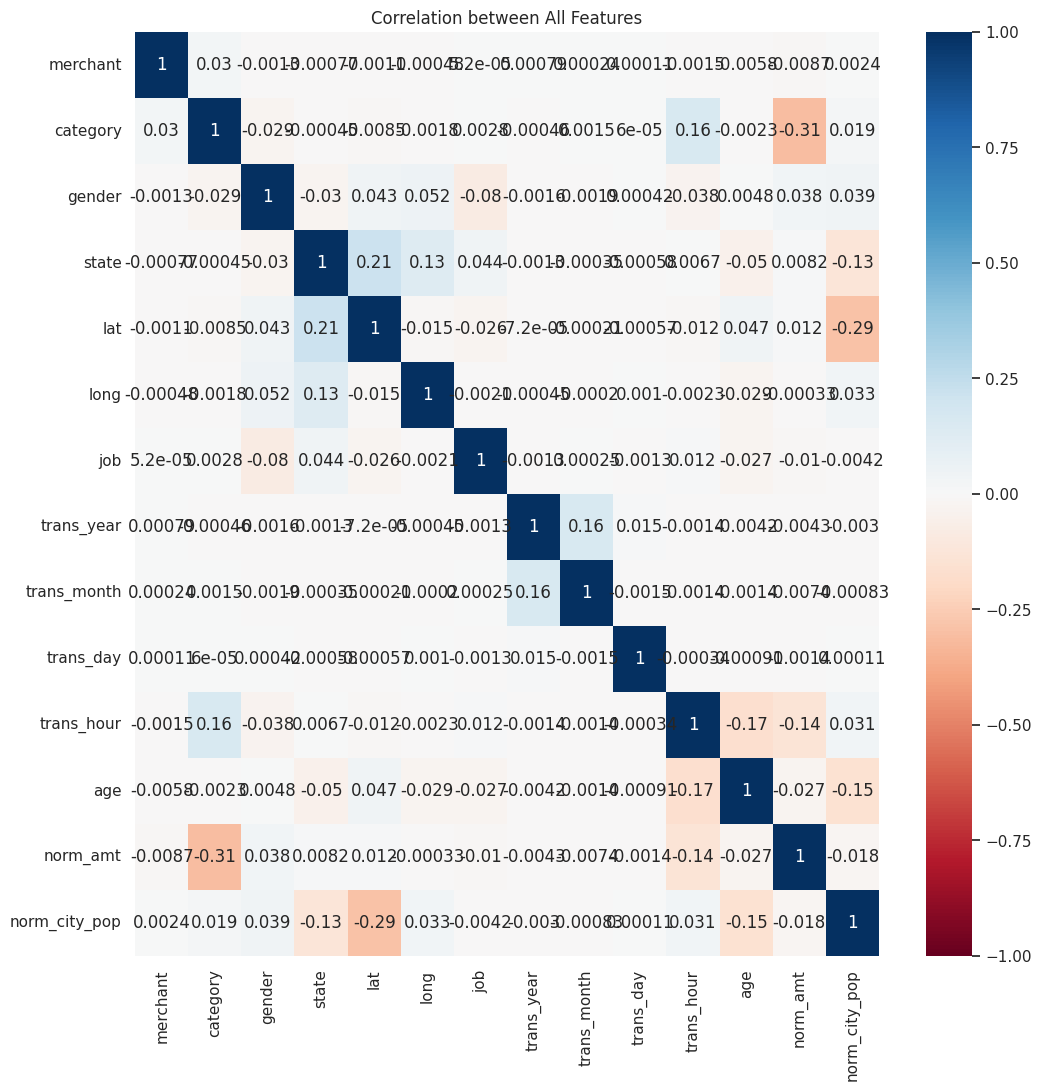

In [29]:
corr_mat = label_df[['merchant', 'category', 'gender', 'state', 'lat', 'long', 'job', 'trans_year', 'trans_month', 'trans_day', 'trans_hour', 'age', 'norm_amt','norm_city_pop']].corr()

plt.figure(figsize=(12,12))
plt.title("Correlation between All Features")
sns.heatmap(corr_mat, cmap='RdBu', annot=True, center=0, vmin=-1)
plt.show()

In [30]:
all_dummies = pd.get_dummies(data_df[['merchant','category','gender','state','lat','long','job','train_test','trans_year','trans_month','trans_day','trans_hour','age','norm_amt','norm_city_pop']])
all_dummies

,lat,long,train_test,trans_year,trans_month,trans_day,trans_hour,age,norm_amt,norm_city_pop,...,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,35.2229,-89.5518,1,0.0,1.000000,0.466667,0.434783,30,2.102914,9.158731,...,False,False,False,False,False,False,False,False,False,False
1,48.4786,-122.3345,1,0.0,0.272727,0.300000,0.913043,49,1.990610,9.607236,...,False,False,False,False,False,False,False,False,False,False
2,44.6084,-70.6993,1,1.0,0.090909,0.500000,0.434783,53,5.001191,5.252273,...,False,False,False,False,False,False,False,False,False,False
3,38.8954,-77.1633,1,1.0,0.272727,0.966667,0.695652,39,3.508556,12.242458,...,False,False,False,False,False,False,False,False,False,False
4,40.9918,-73.9800,1,0.0,1.000000,0.133333,0.913043,58,3.427190,8.447843,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,40.4931,-91.8912,0,1.0,1.000000,1.000000,1.000000,57,3.801538,6.253829,...,False,False,False,False,False,False,False,False,False,False
555715,29.0393,-95.4401,0,1.0,1.000000,1.000000,1.000000,24,4.725971,10.266045,...,False,False,False,False,False,False,False,False,False,False
555716,46.1966,-118.9017,0,1.0,1.000000,1.000000,1.000000,42,4.475972,8.212026,...,False,False,False,False,False,False,False,False,False,False
555717,44.6255,-116.4493,0,1.0,1.000000,1.000000,1.000000,58,2.196113,4.867534,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Scale data 
from sklearn.preprocessing import StandardScaler
num_features = ['norm_amt', 'norm_city_pop', 'age', 'lat', 'long']
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[num_features]= scale.fit_transform(all_dummies_scaled[num_features])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = data_df[data_df.train_test==1].is_fraud
X_train_scaled

,lat,long,trans_year,trans_month,trans_day,trans_hour,age,norm_amt,norm_city_pop,merchant_fraud_Abbott-Rogahn,...,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,-0.655558,0.049113,0.0,1.000000,0.466667,0.434783,-1.132121,-1.106609,0.327925,False,...,False,False,False,False,False,False,False,False,False,False
1,1.960554,-2.335559,0.0,0.272727,0.300000,0.913043,-0.040407,-1.193258,0.511036,False,...,False,False,False,False,False,False,False,False,False,False
2,1.196741,1.420477,1.0,0.090909,0.500000,0.434783,0.189428,1.129597,-1.266973,False,...,False,False,False,False,False,False,False,False,False,False
3,0.069237,0.950274,1.0,0.272727,0.966667,0.695652,-0.614993,-0.022066,1.586924,False,...,False,False,False,False,False,False,False,False,False,False
4,0.482977,1.181833,0.0,1.000000,0.133333,0.913043,0.476721,-0.084845,0.037689,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523169,-0.150362,0.721167,1.0,0.454545,0.533333,0.217391,-1.132121,-0.286450,0.083348,False,...,False,False,False,False,False,False,False,False,False,False
523170,-0.910426,0.189679,0.0,0.181818,0.766667,0.695652,-0.729911,-1.573810,-0.521097,False,...,False,False,False,False,False,False,False,False,False,False
523171,0.448479,1.180378,0.0,1.000000,0.033333,0.391304,0.361804,-1.657600,0.481557,False,...,False,False,False,False,False,False,False,False,False,False
523172,-0.403671,-2.172552,0.0,0.272727,0.266667,0.391304,0.017052,0.889966,-1.443344,False,...,False,False,False,False,False,False,False,False,False,False


### The number of transactions that are fraud is way less than the number of transactions that aren't so I undersampled the number of transactions that aren't fraud

In [32]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=1)
X_resampled, y_resampled = undersampler.fit_resample(X_train_labeled, y_train)
X_resampled

,merchant,category,gender,state,lat,long,job,trans_year,trans_month,trans_day,trans_hour,age,norm_amt,norm_city_pop
275249,219,1,0,38,39.9458,-75.9703,359,1.0,0.090909,0.733333,0.782609,95,4.628105,8.028455
515597,287,12,0,45,36.8809,-82.0956,451,1.0,0.454545,0.000000,0.739130,46,1.891605,9.161360
222175,53,12,1,22,42.4260,-83.1500,401,1.0,0.272727,0.800000,0.347826,56,5.257339,13.420010
341986,176,9,0,47,47.4974,-122.0107,326,0.0,0.272727,0.900000,0.434783,39,4.031760,10.829531
448648,422,10,0,45,37.3696,-80.1284,183,0.0,0.454545,0.033333,0.695652,83,4.841190,7.218177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522794,127,12,1,4,33.7163,-116.3381,265,1.0,0.363636,0.100000,0.956522,68,6.766814,8.450626
522822,308,4,0,20,39.2335,-77.1458,87,1.0,0.363636,0.733333,0.086957,87,5.803748,11.815494
522947,146,4,0,34,42.6560,-73.7508,405,0.0,0.727273,0.900000,0.043478,66,5.763340,11.925187
522959,466,4,1,34,41.1360,-73.7009,463,0.0,0.818182,0.600000,0.434783,59,5.782809,8.985696


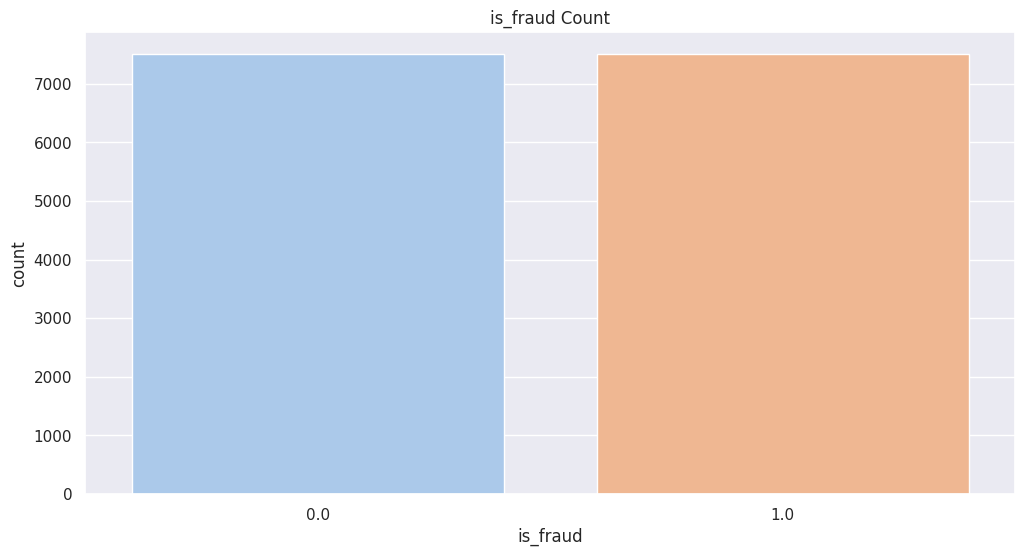

In [33]:
plt.figure(figsize=(12,6))
sns.set_style()
sns.countplot(x=y_resampled)
plt.title("is_fraud Count")
plt.show()

### Since our dataset with one hot encoding contains a lot of features, I use PCA to lower the dimensions

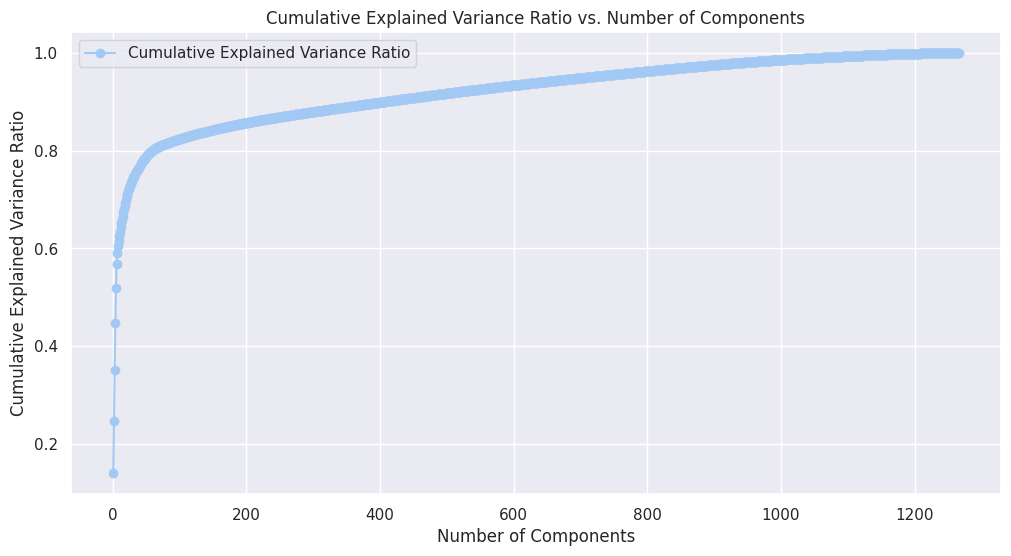

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = explained_variance_ratios.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cum_evr) + 1), cum_evr, marker='o', label='Cumulative Explained Variance Ratio')

plt.title("Cumulative Explained Variance Ratio vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")

plt.legend()
plt.show()

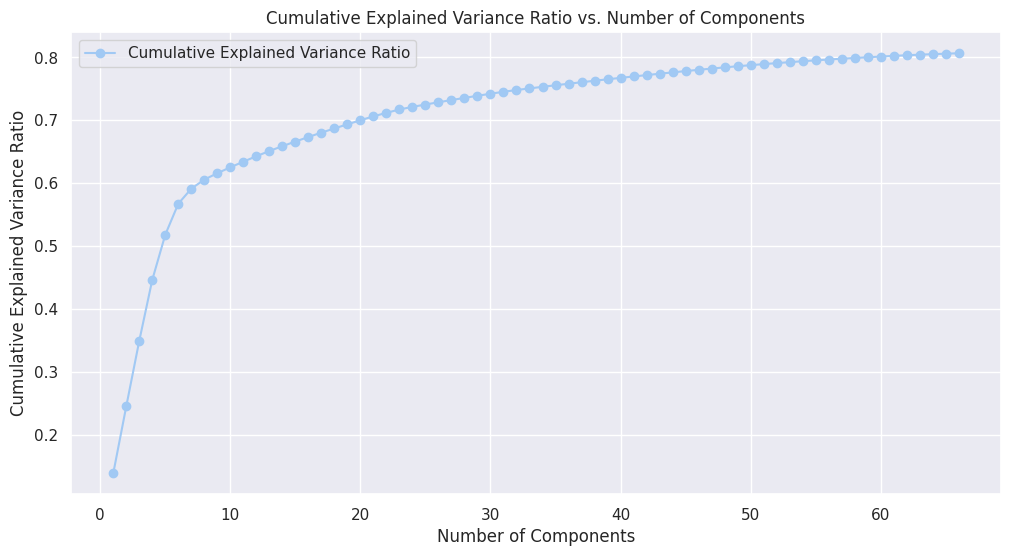

In [35]:
# plot on smaller range to see 80% cumulative explained variance ratio
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cum_evr) + 1 - 1200), cum_evr[:len(cum_evr) - 1200], marker='o', label='Cumulative Explained Variance Ratio')

plt.title("Cumulative Explained Variance Ratio vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")

plt.legend()
plt.show()

In [36]:
pca = PCA(n_components=60)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Model Building (Baseline Validation Performance)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

In [38]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_labeled,y_train,cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

[0.8428448  0.84686548 0.85813892 0.84281371 0.85626916]
0.8493864129200249


In [39]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_resampled,y_resampled,cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

[0.84177481 0.84866281 0.8583729  0.84078436 0.85693038]
0.8493050516292856


In [40]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr,X_train_labeled,y_train,cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

[0.83529012 0.83220655 0.84368134 0.82955993 0.84147967]
0.8364435231759243


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr,X_resampled,y_resampled,cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.8277837  0.83305803 0.8400378  0.82251406 0.83899075]
0.8324768676591427


In [42]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr, X_train_pca, y_train, cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

[0.83617643 0.83621747 0.84775415 0.83068715 0.84414084]
0.8389952101130597


In [43]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_labeled,y_train,cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

[0.92915804 0.92849181 0.92695715 0.93179962 0.92742459]
0.9287662426451663


In [44]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_resampled,y_resampled,cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

[0.96370085 0.9603744  0.96002665 0.96768821 0.96568954]
0.9634959294779956


In [45]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_pca,y_train,cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

[0.88115327 0.87057612 0.88400723 0.88065743 0.88279112]
0.8798370353516978


In [46]:
rf = RandomForestClassifier(random_state = 1, n_estimators=10)
cv = cross_val_score(rf,X_train_labeled,y_train,cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

[0.96726098 0.97116802 0.97005182 0.97205418 0.97270297]
0.9706475929339673


In [47]:
rf = RandomForestClassifier(random_state = 1, n_estimators=10)
cv = cross_val_score(rf,X_resampled,y_resampled,cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

[0.98795654 0.98994767 0.98936751 0.9908562  0.99197226]
0.9900200369000247


In [48]:
rf = RandomForestClassifier(random_state = 1, n_estimators=10)
cv = cross_val_score(rf,X_train_pca,y_train,cv=5,scoring='roc_auc')
print(cv)
print(cv.mean())

[0.95373121 0.95073053 0.95059936 0.9525867  0.95165171]
0.9518599007672691


### After this point, I stick with just using X_resampled because it runs faster and has better cross validation scores using roc auc. It also just makes more sense to train on data taht contains an even proportion for each class

In [49]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_resampled,y_resampled,cv=5,scoring='roc_auc')
print(cv)
print(cv.mean())

[0.55428693 0.54974291 0.56364578 0.54777583 0.55982399]
0.5550550888524597


In [50]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_resampled,y_resampled,cv=5)
print(cv)
print(cv.mean())

[0.59274059 0.58574759 0.57261825 0.58894071 0.6005996 ]
0.5881293478895078


In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_resampled,y_resampled,cv=5,scoring='roc_auc')
print(cv)
print(cv.mean())

[0.99554137 0.99833267 0.99731625 0.9968229  0.99783001]
0.9971686381917483


In [52]:
dt = tree.DecisionTreeClassifier(random_state = 1)
rf = RandomForestClassifier(random_state = 1, n_estimators=10)
knn = KNeighborsClassifier()
gnb = GaussianNB()

voting_clf = VotingClassifier(estimators = [('knn',knn),('rf',rf),('xgb', xgb), ('dt', dt), ('gnb', gnb)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_resampled,y_resampled,cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

[0.9883584  0.99320338 0.99117355 0.99427874 0.99454772]
0.992312358118407


In [53]:
gbc = GradientBoostingClassifier(random_state=1)
cv = cross_val_score(gbc, X_resampled,y_resampled, cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

[0.98970682 0.99396873 0.99147359 0.99487883 0.99512894]
0.993031383740709


In [54]:
abc = AdaBoostClassifier(random_state=1)
cv = cross_val_score(abc, X_resampled,y_resampled, cv=5, scoring='roc_auc')
print(cv)
print(cv.mean())

[0.98108296 0.98397606 0.98335731 0.98680737 0.98700001]
0.9844447424927724


## Model Tuned Performance 
After getting the baselines, I mainly used grid search to tune the models. I also used Randomized Search for the Random Forest to simplify testing time. 

|Model|Tuned Performance|
|-----|-------|
|Naive Bayes|NA|
|Logistic Regression|79.2%|
|Decision Tree| 94.8% |
|Random Forest|98.8% |
|K Nearest Neighbor|NA|
|SVC| NA|
|Xtreme Gradient Boosting|NA|
|Ada Boosting| 95.0%
|Gradient Boosting|98.8%


In [55]:
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import roc_auc_score

In [56]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [57]:
lr = LogisticRegression()
param_grid = {'max_iter' : [1000,2000,5000,10000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'tol': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0],
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_resampled,y_resampled)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Logistic Regression
Best Score: 0.7943646404672388
Best Parameters: {'C': 0.615848211066026, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


In [58]:
roc_auc = roc_auc_score(y_train, best_clf_lr.predict(X_train_labeled))
print(f"ROC_AUC Score: {roc_auc}")

ROC_AUC Score: 0.7922712632606771


In [59]:
dt = tree.DecisionTreeClassifier(random_state = 1)
param_grid = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'splitter' : ['random', 'best'],
              'max_depth': [3,5,10,20,50,75,100,None],
              'max_features': [None, 'sqrt', 'log2']}

clf_dt = GridSearchCV(dt, param_grid = param_grid, cv = 10, verbose = True, n_jobs = -1, scoring='roc_auc')
best_clf_dt = clf_dt.fit(X_resampled,y_resampled)
clf_performance(best_clf_dt,'Decision Tree')

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Decision Tree
Best Score: 0.9860974497090135
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}


In [60]:
roc_auc = roc_auc_score(y_train, best_clf_dt.predict(X_train_labeled))
print(f"ROC_AUC Score: {roc_auc}")

ROC_AUC Score: 0.9480600982212386


In [61]:
from sklearn.model_selection import RandomizedSearchCV 

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [5, 10, 20], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['log2','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 250, cv = 5, verbose = True, n_jobs = -1, scoring='roc_auc')
best_clf_rf_rnd = clf_rf_rnd.fit(X_resampled,y_resampled)
clf_performance(best_clf_rf_rnd,'Random Forest')

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
Random Forest
Best Score: 0.9944756010177427
Best Parameters: {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [62]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [10,20,30,40],
               'criterion':['gini','entropy'],
                'bootstrap': [False],
                'max_depth': [50, 100, 150, 200],
                'max_features': ['sqrt'],
                'min_samples_leaf': [1, 2, 3, 4],
                'min_samples_split': [4, 5, 6]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_resampled,y_resampled)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Random Forest
Best Score: 0.9705569358467427
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 40}


In [63]:
roc_auc = roc_auc_score(y_train, best_clf_rf.best_estimator_.predict(X_train_labeled))
print(f"ROC_AUC Score: {roc_auc}")

ROC_AUC Score: 0.9889405586540176


In [64]:
ab = AdaBoostClassifier(random_state = 1)
param_grid =  {'n_estimators': [50, 100, 200, 500],
               'algorithm':['SAMME','SAMME.R'],
                'learning_rate': [0.01, 0.1, 0.5, 1.0]}
                                  
clf_ab = GridSearchCV(ab, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_ab = clf_ab.fit(X_resampled,y_resampled)
clf_performance(best_clf_ab,'Ada Boost Classifier')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Ada Boost Classifier
Best Score: 0.9479751871490713
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 500}


In [65]:
roc_auc = roc_auc_score(y_train, best_clf_ab.best_estimator_.predict(X_train_labeled))
print(f"ROC_AUC Score: {roc_auc}")

ROC_AUC Score: 0.9497849460708769


In [66]:
gb = GradientBoostingClassifier(random_state = 1)
param_grid =  {'n_estimators': [50, 100, 200, 500],
               'loss':['log_loss','exponential'],
               'learning_rate': [0.01, 0.1, 0.5, 1.0],
               'criterion' : ['friedman_mse', 'squared_error']}
                                  
clf_gb = GridSearchCV(gb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_gb = clf_gb.fit(X_resampled,y_resampled)
clf_performance(best_clf_gb,'Gradient Boost Classifier')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Gradient Boost Classifier
Best Score: 0.9760191840138542
Best Parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 500}


In [67]:
roc_auc = roc_auc_score(y_train, best_clf_gb.best_estimator_.predict(X_train_labeled))
print(f"ROC_AUC Score: {roc_auc}")

ROC_AUC Score: 0.9886360991956065


## Stacking Models with Logistic Regression as the Meta-Model
#### 1) Find all combinations of models with above 90%
#### 2) Perform a stacking classifier on all and get roc scores
#### 3) Pick the best score

In [68]:
from itertools import combinations, chain

best_rf = best_clf_rf.best_estimator_
best_dt = best_clf_dt.best_estimator_
best_gb = best_clf_gb.best_estimator_
best_ab = best_clf_ab.best_estimator_

models = {
    'gb': best_gb,
    'ada': best_ab,
    'rf': best_rf,
    'dt': best_dt,
    'xgb': XGBClassifier(random_state =1),
}

# Get all combinations of models
all_model_combinations = []

for r in range(1, len(models) + 1):
    model_combinations = combinations(models.keys(), r)
    all_model_combinations.extend(model_combinations)
    
all_model_combinations = [list(combination) for combination in all_model_combinations][5:]

print(all_model_combinations)

[['gb', 'ada'], ['gb', 'rf'], ['gb', 'dt'], ['gb', 'xgb'], ['ada', 'rf'], ['ada', 'dt'], ['ada', 'xgb'], ['rf', 'dt'], ['rf', 'xgb'], ['dt', 'xgb'], ['gb', 'ada', 'rf'], ['gb', 'ada', 'dt'], ['gb', 'ada', 'xgb'], ['gb', 'rf', 'dt'], ['gb', 'rf', 'xgb'], ['gb', 'dt', 'xgb'], ['ada', 'rf', 'dt'], ['ada', 'rf', 'xgb'], ['ada', 'dt', 'xgb'], ['rf', 'dt', 'xgb'], ['gb', 'ada', 'rf', 'dt'], ['gb', 'ada', 'rf', 'xgb'], ['gb', 'ada', 'dt', 'xgb'], ['gb', 'rf', 'dt', 'xgb'], ['ada', 'rf', 'dt', 'xgb'], ['gb', 'ada', 'rf', 'dt', 'xgb']]


In [69]:
columns = [model for model in models]
probabilities_df = pd.DataFrame(columns=columns)

for model, clf in models.items():
    clf.fit(X_train_labeled, y_train)
    y_prob = clf.predict_proba(X_train_labeled)[:, 1]
    probabilities_df[model] = y_prob

probabilities_df

,gb,ada,rf,dt,xgb
0,2.162539e-05,0.495870,0.0,0.003272,4.306878e-04
1,4.240051e-09,0.493969,0.0,0.000108,2.611012e-05
2,2.772671e-07,0.496151,0.0,0.000180,1.052796e-04
3,1.794167e-12,0.493339,0.0,0.000180,1.091795e-06
4,5.499932e-08,0.493706,0.0,0.000180,2.432319e-05
...,...,...,...,...,...
523169,1.179642e-05,0.496437,0.0,0.003272,1.609114e-03
523170,1.338405e-09,0.495747,0.0,0.000108,1.794957e-06
523171,6.084578e-11,0.492901,0.0,0.000108,9.981313e-07
523172,1.589369e-09,0.493633,0.0,0.000180,1.045013e-04


In [70]:
lr = LogisticRegression()
cv = cross_val_score(lr, probabilities_df, y_train, scoring='roc_auc')
print(cv)
print(cv.mean())

[1.         0.99999993 0.99999999 0.99999988 1.        ]
0.9999999612566027


In [71]:
from sklearn.ensemble import StackingClassifier

In [72]:
combination_scores = {}
for model_combination in all_model_combinations:
    base_models = [(name, models[name]) for name in model_combination]
    meta_model = LogisticRegression()

    stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
    stacked_model.fit(X_resampled, y_resampled)
    
    roc_auc = roc_auc_score(y_train, stacked_model.predict(X_train_labeled))
    combination_scores[tuple(model_combination)] = roc_auc
    
    print(f"Combination: {model_combination}, Stacked Model Accuracy: {roc_auc}")
    

Combination: ['gb', 'ada'], Stacked Model Accuracy: 0.9886283422667297
Combination: ['gb', 'rf'], Stacked Model Accuracy: 0.989909205147498
Combination: ['gb', 'dt'], Stacked Model Accuracy: 0.9889172878673875
Combination: ['gb', 'xgb'], Stacked Model Accuracy: 0.9894515463437716
Combination: ['ada', 'rf'], Stacked Model Accuracy: 0.9879951829471675
Combination: ['ada', 'dt'], Stacked Model Accuracy: 0.9480600982212386
Combination: ['ada', 'xgb'], Stacked Model Accuracy: 0.9892799242923741
Combination: ['rf', 'dt'], Stacked Model Accuracy: 0.9879457325255785
Combination: ['rf', 'xgb'], Stacked Model Accuracy: 0.9899984098295802
Combination: ['dt', 'xgb'], Stacked Model Accuracy: 0.9893034852146001
Combination: ['gb', 'ada', 'rf'], Stacked Model Accuracy: 0.9899082355313884
Combination: ['gb', 'ada', 'dt'], Stacked Model Accuracy: 0.9889172878673875
Combination: ['gb', 'ada', 'xgb'], Stacked Model Accuracy: 0.9894515463437716
Combination: ['gb', 'rf', 'dt'], Stacked Model Accuracy: 0.98

In [73]:
sorted_combinations = sorted(combination_scores.items(), key=lambda x: x[1], reverse=True)

for combination, score in sorted_combinations:
    print(f"Combination: {combination}, Stacked Model AUC-ROC: {score}")

Combination: ('gb', 'rf', 'dt', 'xgb'), Stacked Model AUC-ROC: 0.9900798575827858
Combination: ('gb', 'ada', 'rf', 'dt', 'xgb'), Stacked Model AUC-ROC: 0.9900798575827858
Combination: ('gb', 'rf', 'xgb'), Stacked Model AUC-ROC: 0.9900730702700187
Combination: ('gb', 'ada', 'rf', 'xgb'), Stacked Model AUC-ROC: 0.9900730702700187
Combination: ('rf', 'dt', 'xgb'), Stacked Model AUC-ROC: 0.9900439817867309
Combination: ('ada', 'rf', 'dt', 'xgb'), Stacked Model AUC-ROC: 0.9900439817867309
Combination: ('rf', 'xgb'), Stacked Model AUC-ROC: 0.9899984098295802
Combination: ('ada', 'rf', 'xgb'), Stacked Model AUC-ROC: 0.9899984098295802
Combination: ('gb', 'rf', 'dt'), Stacked Model AUC-ROC: 0.9899664124979638
Combination: ('gb', 'ada', 'rf', 'dt'), Stacked Model AUC-ROC: 0.9899664124979638
Combination: ('gb', 'rf'), Stacked Model AUC-ROC: 0.989909205147498
Combination: ('gb', 'ada', 'rf'), Stacked Model AUC-ROC: 0.9899082355313884
Combination: ('gb', 'dt', 'xgb'), Stacked Model AUC-ROC: 0.9895

In [74]:
combination_scores = {}
for model_combination in all_model_combinations:
    base_models = [(name, models[name]) for name in model_combination]
    meta_model = LogisticRegression()

    voting_model = VotingClassifier(estimators=base_models, voting='soft')
    voting_model.fit(X_resampled, y_resampled)
    
    roc_auc = roc_auc_score(y_train, voting_model.predict(X_train_labeled))
    combination_scores[tuple(model_combination)] = roc_auc
    
    print(f"Combination: {model_combination}, Stacked Model Accuracy: {roc_auc}")

Combination: ['gb', 'ada'], Stacked Model Accuracy: 0.9886438561244831
Combination: ['gb', 'rf'], Stacked Model Accuracy: 0.9896318949401554
Combination: ['gb', 'dt'], Stacked Model Accuracy: 0.9883392899643791
Combination: ['gb', 'xgb'], Stacked Model Accuracy: 0.989315800088429
Combination: ['ada', 'rf'], Stacked Model Accuracy: 0.9889298928768122
Combination: ['ada', 'dt'], Stacked Model Accuracy: 0.9480600982212386
Combination: ['ada', 'xgb'], Stacked Model Accuracy: 0.9892527750413057
Combination: ['rf', 'dt'], Stacked Model Accuracy: 0.973231321316815
Combination: ['rf', 'xgb'], Stacked Model Accuracy: 0.9902718415724846
Combination: ['dt', 'xgb'], Stacked Model Accuracy: 0.9849940769244405
Combination: ['gb', 'ada', 'rf'], Stacked Model Accuracy: 0.9896318949401554
Combination: ['gb', 'ada', 'dt'], Stacked Model Accuracy: 0.9882293339990776
Combination: ['gb', 'ada', 'xgb'], Stacked Model Accuracy: 0.989322587401196
Combination: ['gb', 'rf', 'dt'], Stacked Model Accuracy: 0.9898

In [75]:
sorted_combinations = sorted(combination_scores.items(), key=lambda x: x[1], reverse=True)

for combination, score in sorted_combinations:
    print(f"Combination: {combination}, Stacked Model AUC-ROC: {score}")

Combination: ('ada', 'rf', 'xgb'), Stacked Model AUC-ROC: 0.990275720036923
Combination: ('rf', 'xgb'), Stacked Model AUC-ROC: 0.9902718415724846
Combination: ('gb', 'rf', 'dt', 'xgb'), Stacked Model AUC-ROC: 0.9901254295399365
Combination: ('gb', 'ada', 'rf', 'dt', 'xgb'), Stacked Model AUC-ROC: 0.9901215510754983
Combination: ('gb', 'ada', 'rf', 'xgb'), Stacked Model AUC-ROC: 0.989973199810731
Combination: ('gb', 'rf', 'xgb'), Stacked Model AUC-ROC: 0.9899722301946213
Combination: ('gb', 'rf', 'dt'), Stacked Model AUC-ROC: 0.9898791470481006
Combination: ('gb', 'ada', 'rf', 'dt'), Stacked Model AUC-ROC: 0.9898781774319911
Combination: ('gb', 'ada', 'dt', 'xgb'), Stacked Model AUC-ROC: 0.9896997680678267
Combination: ('gb', 'dt', 'xgb'), Stacked Model AUC-ROC: 0.9896978288356074
Combination: ('gb', 'rf'), Stacked Model AUC-ROC: 0.9896318949401554
Combination: ('gb', 'ada', 'rf'), Stacked Model AUC-ROC: 0.9896318949401554
Combination: ('gb', 'ada', 'xgb'), Stacked Model AUC-ROC: 0.9893

In [76]:
best_stacking_clf = StackingClassifier(estimators=[('dt', models['dt']), ('gb', models['gb']), ('rf', models['rf'])], final_estimator= LogisticRegression())
best_stacking_xgb_clf = StackingClassifier(estimators=[('gb', models['gb']), ('rf', models['rf']), ('dt', models['dt']),('xgb',models['xgb'])], final_estimator= LogisticRegression())

best_voting_clf = VotingClassifier(estimators=[('gb',models['gb']), ('rf', models['rf']), ('dt', models['dt'])], voting='soft')
best_voting_xgb_clf = VotingClassifier(estimators=[('ada',models['ada']),('gb',models['gb']),('xgb',models['xgb'])], voting='soft')

In [77]:
best_stacking_clf.fit(X_resampled, y_resampled)
best_stacking_xgb_clf.fit(X_resampled, y_resampled)
best_voting_clf.fit(X_resampled, y_resampled)
best_voting_xgb_clf.fit(X_resampled, y_resampled)

VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(n_estimators=500,
                                                 random_state=1)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.5,
                                                         loss='exponential',
                                                         n_estimators=500,
                                                         random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=Non...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=1, ...))],
                 voting='soft')

In [78]:
best_stacking_pred = best_stacking_clf.predict(X_test_labeled)
best_stacking_no_xgb_pred = best_stacking_xgb_clf.predict(X_test_labeled)
best_voting_pred = best_voting_clf.predict(X_test_labeled)
best_voting_xgb_pred = best_voting_xgb_clf.predict(X_test_labeled)

best_stacking_sub = pd.DataFrame({'is_fraud': best_stacking_pred})
best_stacking_no_xgb_sub = pd.DataFrame({'is_fraud': best_stacking_no_xgb_pred})
best_voting_sub = pd.DataFrame({'is_fraud': best_voting_pred})
best_voting_xgb_sub = pd.DataFrame({'is_fraud': best_voting_xgb_pred})

best_stacking_sub.index = df_test_id
best_stacking_no_xgb_sub.index = df_test_id
best_voting_sub.index = df_test_id
best_voting_xgb_sub.index = df_test_id

best_stacking_sub.index.name = 'id'
best_stacking_no_xgb_sub.index.name = 'id'
best_voting_sub.index.name = 'id'
best_voting_xgb_sub.index.name = 'id'

best_stacking_sub.to_csv('best_stacking_submission.csv') # done this submission
best_stacking_no_xgb_sub.to_csv('no_xgb_stacking_submission.csv') # done this submission
best_voting_sub.to_csv('best_voting_submission.csv')
best_voting_xgb_sub.to_csv('best_voting_xgb_submission.csv')